### **Instruções**

- A planilha para fazer o exercício está dentro de arquivo compactado está no site do IBGE: Estatísticas > Econômicas > Contas Nacionais > Produto Interno Bruto dos Municípios

- Todos os dados necessários estão na planilha "PIB dos Municípios - base de dados 2010-2017.xls"

- Grande parte do conteúdo necessário para fazer a lista está nos notebooks 14, 15 e 16. Procurar no stackoverflow/documentação/google é essencial, o conhecimento medido aqui também envolve saber procurar dúvidas na internet. Até a entrega ainda haverá outra aula de Pandas. De qualquer forma, sugiro fortemente já começar a fazer a lista agora, assim como já consultar o notebook que ainda não foi dado: "16_Pandas_EDA".

- A entrega é para o dia 05/10/2020

**É permitido:**

- Usar qualquer pacote de visualização nos exercícios de gráficos (matplotlib, seaborn, pandas.plot, etc.). É necessário que os gráficos sejam informativos, logo título dos eixos são obrigatórios (algum tipo de variação nas cores e bom senso estético são bem-vindos também).

- Usar qualquer pacote em qualquer questão. Em caso de dúvidas sobre o enunciado das questões, me enviem um email.


# Leitura dos Dados

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
plt.rcParams["figure.figsize"] = (15,8)

In [11]:
arquivo = os.path.join('Data','PIB dos Municípios - base de dados 2010-2017.xls')
dados = pd.read_excel(arquivo)
dados.head()

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,...,"Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
0,2010,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,...,16118.534,62496.185,93244.656,241119.767,20957.111,262076.878,10731.18,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
1,2010,1,Norte,11,RO,Rondônia,1100023,Ariquemes,NaN,1102,...,287138.585,494946.267,343867.731,1199664.227,165029.553,1364693.780,15103.86,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
2,2010,1,Norte,11,RO,Rondônia,1100031,Cabixi,NaN,1102,...,3252.506,12677.210,25170.235,65400.772,4210.342,69611.114,11033.62,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
3,2010,1,Norte,11,RO,Rondônia,1100049,Cacoal,NaN,1102,...,182051.537,465447.325,298454.309,1041212.374,145281.717,1186494.091,15095.15,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
4,2010,1,Norte,11,RO,Rondônia,1100056,Cerejeiras,NaN,1102,...,19734.484,80724.991,63018.270,192454.160,29567.029,222021.189,13037.06,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...


In [12]:
dados.columns = ['Ano', 'Código da Grande Região', 'Nome da Grande Região',
       'Código da Unidade da Federação', 'Sigla da Unidade da Federação',
       'Nome da Unidade da Federação', 'Código do Município',
       'Nome do Município', 'Região Metropolitana', 'Código da Mesorregião',
       'Nome da Mesorregião', 'Código da Microrregião', 'Nome da Microrregião',
       'Código da Região Geográfica Imediata',
       'Nome da Região Geográfica Imediata',
       'Município da Região Geográfica Imediata',
       'Código da Região Geográfica Intermediária',
       'Nome da Região Geográfica Intermediária',
       'Município da Região Geográfica Intermediária',
       'Código Concentração Urbana', 'Nome Concentração Urbana',
       'Tipo Concentração Urbana', 'Código Arranjo Populacional',
       'Nome Arranjo Populacional', 'Hierarquia Urbana',
       'Hierarquia Urbana (principais categorias)', 'Código da Região Rural',
       'Nome da Região Rural',
       'Região rural (segundo classificação do núcleo)', 'Amazônia Legal',
       'Semiárido', 'Cidade-Região de São Paulo',
       'Valor adicionado bruto da Agropecuária (R$ 1.000)',
       'Valor adicionado bruto da Indústria (R$ 1.000)',
       'Valor adicionado bruto dos Serviços - exceto Administração, defesa, educação e saúde públicas e seguridade social (R$ 1.000)',
       'Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social (R$ 1.000)',
       'Valor adicionado bruto total (R$ 1.000)',
       'Impostos (R$ 1.000)',
       'PIB (R$ 1.000)',
       'PIB per capita (R$ 1,00)',
       'Atividade com maior valor adicionado bruto',
       'Atividade com segundo maior valor adicionado bruto',
       'Atividade com terceiro maior valor adicionado bruto']

## Cidade por estado em 2017

In [13]:
dados_2017 = dados[dados['Ano'] == 2017].reset_index(drop = True)
dados_2017.groupby('Nome da Unidade da Federação')['Nome do Município'].unique().apply(lambda x:len(x))

Nome da Unidade da Federação
Acre                    22
Alagoas                102
Amapá                   16
Amazonas                62
Bahia                  417
Ceará                  184
Distrito Federal         1
Espírito Santo          78
Goiás                  246
Maranhão               217
Mato Grosso            141
Mato Grosso do Sul      79
Minas Gerais           853
Paraná                 399
Paraíba                223
Pará                   144
Pernambuco             185
Piauí                  224
Rio Grande do Norte    167
Rio Grande do Sul      497
Rio de Janeiro          92
Rondônia                52
Roraima                 15
Santa Catarina         295
Sergipe                 75
São Paulo              645
Tocantins              139
Name: Nome do Município, dtype: int64

# Impostos/PIB. 

In [41]:
dados['Impostos/PIB'] = dados['Impostos (R$ 1.000)']/dados['PIB (R$ 1.000)']
imp_pib = dados['Impostos/PIB'][dados['Ano'] == 2017]

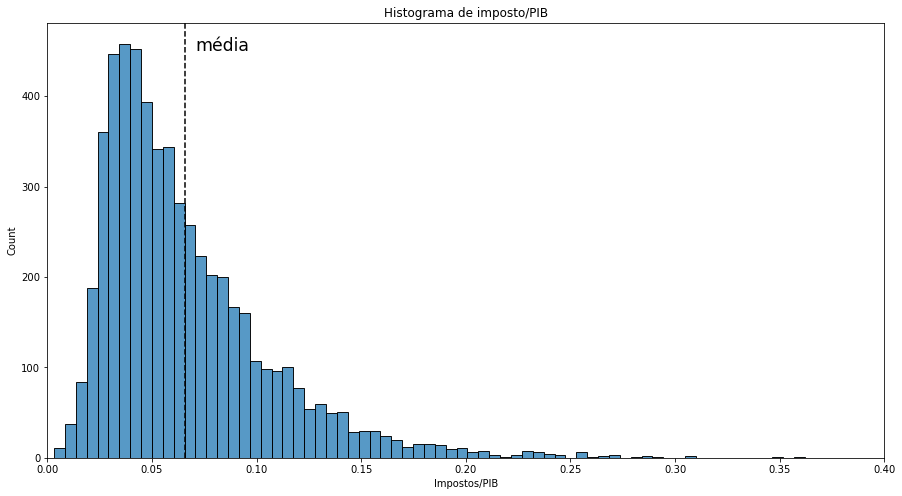

In [38]:
fig = sns.histplot(imp_pib)
media = imp_pib.mean()
plt.axvline(media, ls = '--', c = 'black')
plt.title('Histograma de imposto/PIB')
plt.text(media + 0.005, 450, 'média', size = 'xx-large')
plt.xlim(0,0.4)
plt.show()

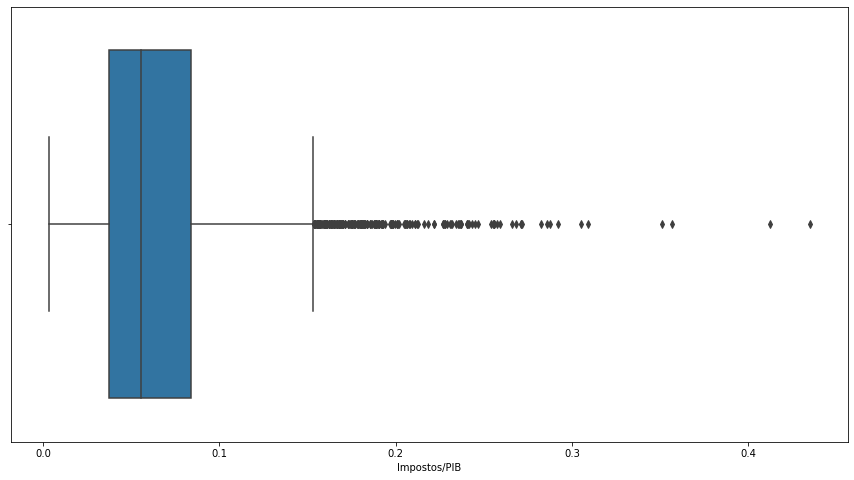

In [17]:
sns.boxplot(data = dados[dados['Ano'] == 2017], x = 'Impostos/PIB')
plt.show()

In [52]:
dados[dados['Ano'] == 2017].sort_values('Impostos/PIB')[['Nome do Município', 'Nome da Unidade da Federação']].head(10)

,Nome do Município,Nome da Unidade da Federação
40711,Santana do Mundaú,Alagoas
40635,Branquinha,Alagoas
39125,Uiramutã,Roraima
44375,Davinópolis,Goiás
40662,Jacuípe,Alagoas
44149,Selvíria,Mato Grosso do Sul
39120,Normandia,Roraima
39111,Amajari,Roraima
40708,Roteiro,Alagoas
39105,Tapauá,Amazonas


In [53]:
## fazer a lista de importo/pib por região

### 3) Existe alguma relação entre PIB per capita e atividade com maior valor adicionado bruto?

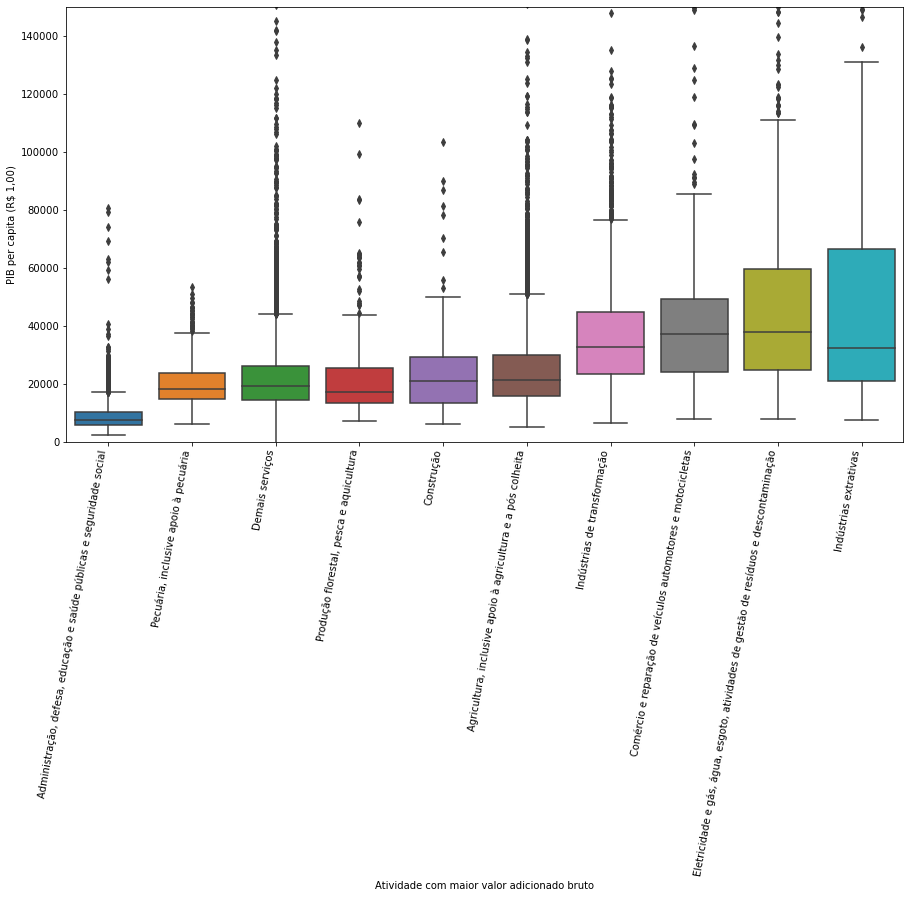

In [91]:
ordem = dados.groupby('Atividade com maior valor adicionado bruto')['PIB per capita (R$ 1,00)'].mean().to_frame().sort_values('PIB per capita (R$ 1,00)')
ordem = list(ordem.index)

p = sns.boxplot(x = 'Atividade com maior valor adicionado bruto', y='PIB per capita (R$ 1,00)', data = dados, order = ordem)
p.set_xticklabels(p.get_xticklabels(), rotation = 80, horizontalalignment = 'right')
plt.ylim(0,150000)
plt.show()

In [10]:
media_pibpc = dados.groupby('Atividade com maior valor adicionado bruto')['PIB per capita (R$ 1,00)'].mean().sort_values()
media_pibpc = media_pibpc.to_frame().reset_index()
media_pibpc

,Atividade com maior valor adicionado bruto,"PIB per capita (R$ 1,00)"
0,"Administração, defesa, educação e saúde públic...",8609.703235
1,"Pecuária, inclusive apoio à pecuária",19808.056472
2,Demais serviços,22121.604018
3,"Produção florestal, pesca e aquicultura",23190.935992
4,Construção,25213.240183
5,"Agricultura, inclusive apoio à agricultura e a...",25477.872595
6,Indústrias de transformação,38614.117626
7,Comércio e reparação de veículos automotores e...,44116.076822
8,"Eletricidade e gás, água, esgoto, atividades d...",52083.287533
9,Indústrias extrativas,59406.835633


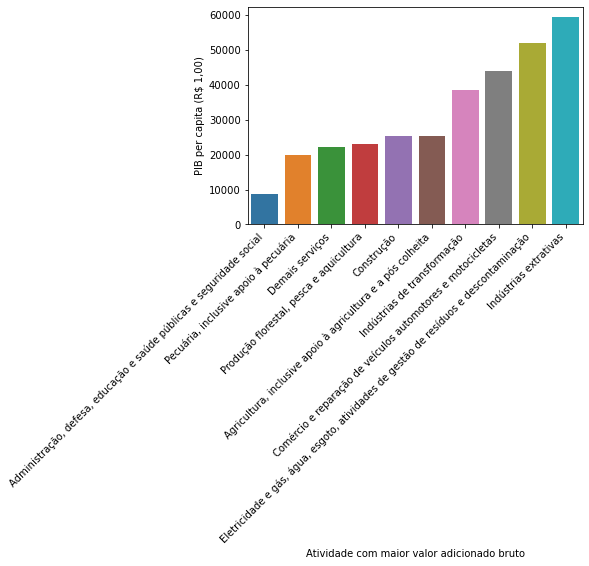

In [11]:
p = sns.barplot(x = 'Atividade com maior valor adicionado bruto', y = 'PIB per capita (R$ 1,00)', data = media_pibpc)
p.set_xticklabels(p.get_xticklabels() ,rotation = 45, horizontalalignment = 'right')
plt.show()

### 5) Crie um dicionário com 'UF:Cidade com maior PIB per capita em 2017' para todas as UFs (excluindo DF).

Uma sugestão é criar um dicionário vazio e usar um 'for' para preenchê-lo

In [12]:
dados_2017_semdf = dados_2017.drop(dados_2017[dados_2017['Sigla da Unidade da Federação'] == 'DF'].index).reset_index(drop = True)
maximos = dados_2017_semdf.groupby('Sigla da Unidade da Federação')['PIB per capita (R$ 1,00)'].max()

uf = {}
for i in maximos.index:
    uf.update({i:tuple(dados_2017_semdf[(dados_2017_semdf['Sigla da Unidade da Federação'] == i) & (dados_2017_semdf['PIB per capita (R$ 1,00)'] == maximos[i])]['Nome do Município'].values) })

In [13]:
uf

{'AC': ('Epitaciolândia',),
 'AL': ('Santana do Mundaú',),
 'AM': ('Manaus',),
 'AP': ('Ferreira Gomes',),
 'BA': ('São Francisco do Conde',),
 'CE': ('São Gonçalo do Amarante',),
 'ES': ('Presidente Kennedy',),
 'GO': ('Davinópolis',),
 'MA': ('Tasso Fragoso',),
 'MG': ('São Gonçalo do Rio Abaixo',),
 'MS': ('Selvíria',),
 'MT': ('Campos de Júlio',),
 'PA': ('Vitória do Xingu',),
 'PB': ('Alhandra',),
 'PE': ('Goiana',),
 'PI': ('Baixa Grande do Ribeiro',),
 'PR': ('Saudade do Iguaçu',),
 'RJ': ('Porto Real',),
 'RN': ('Guamaré',),
 'RO': ('Pimenteiras do Oeste',),
 'RR': ('Boa Vista',),
 'RS': ('Triunfo',),
 'SC': ('Piratuba',),
 'SE': ('Canindé de São Francisco',),
 'SP': ('Paulínia',),
 'TO': ('Cariri do Tocantins',)}

### 6) Qual (grande) região mais cresceu entre 2010 e 2017?

Variação da soma dos PIBs por região entre 2010 e 2017

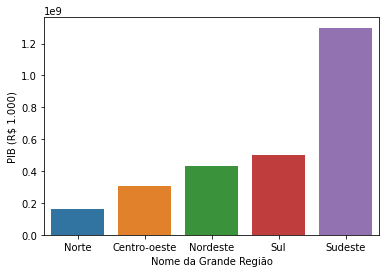

In [14]:
pib_por_região = dados.groupby(['Ano', 'Nome da Grande Região'])['PIB (R$ 1.000)'].sum()
crescimento = pib_por_região[2017] - pib_por_região[2010]
sns.barplot(x = 'Nome da Grande Região', y = 'PIB (R$ 1.000)' ,data = crescimento.sort_values().to_frame().reset_index())
plt.show()

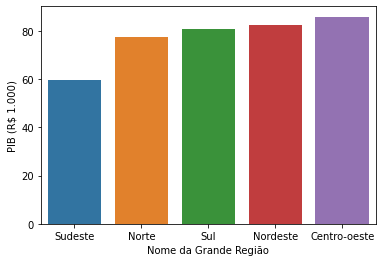

In [15]:
crescimento_percent = (pib_por_região[2017] - pib_por_região[2010])/pib_por_região[2010] * 100
sns.barplot(x = 'Nome da Grande Região', y = 'PIB (R$ 1.000)' ,data = crescimento_percent.sort_values().to_frame().reset_index())
plt.show()

In [ ]:
### deixar cores igual e subplot

### 7) Quais os 10 municípios que mais perderam PIB no triênio 2014-2015-2016?

Variação de PIB entre 2013 e 2016

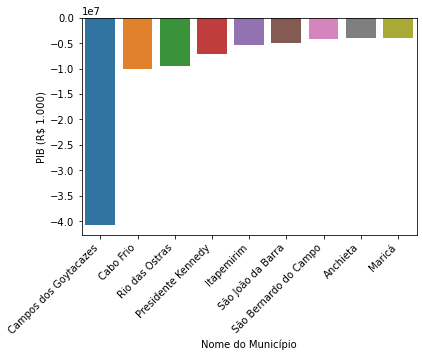

In [19]:
pib_por_cidade = dados.groupby(['Ano', 'Nome do Município'])['PIB (R$ 1.000)'].sum()
crescimento = pib_por_cidade[2016] - pib_por_cidade[2014]
p = sns.barplot(x = 'Nome do Município', y = 'PIB (R$ 1.000)' ,data = crescimento.sort_values().to_frame().reset_index()[:9])
p.set_xticklabels(p.get_xticklabels() ,rotation = 45, horizontalalignment = 'right')
plt.show()

### 8) Quais os 10 municípios do RJ que mais cresceram entre 2010-2017

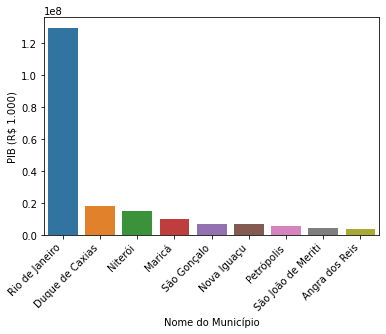

In [21]:
dados_rj = dados[dados['Sigla da Unidade da Federação'] == 'RJ']
pib_por_cidade = dados_rj.groupby(['Ano', 'Nome do Município'])['PIB (R$ 1.000)'].sum()
crescimento_rj = pib_por_cidade[2017] - pib_por_cidade[2010]
p = sns.barplot(x = 'Nome do Município', y = 'PIB (R$ 1.000)' ,data = crescimento_rj.sort_values( ascending=False).to_frame().reset_index()[:9])
p.set_xticklabels(p.get_xticklabels() ,rotation = 45, horizontalalignment = 'right')
plt.show()

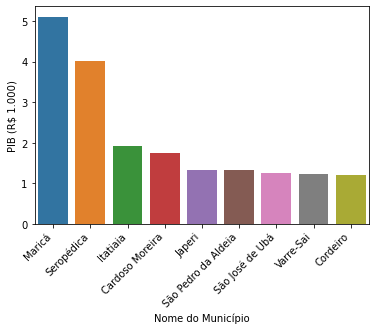

In [22]:
dados_rj = dados[dados['Sigla da Unidade da Federação'] == 'RJ']
pib_por_cidade = dados_rj.groupby(['Ano', 'Nome do Município'])['PIB (R$ 1.000)'].sum()
crescimento_rj = (pib_por_cidade[2017] - pib_por_cidade[2010])/pib_por_cidade[2010]
p = sns.barplot(x = 'Nome do Município', y = 'PIB (R$ 1.000)' ,data = crescimento_rj.sort_values( ascending=False).to_frame().reset_index()[:9])
p.set_xticklabels(p.get_xticklabels() ,rotation = 45, horizontalalignment = 'right')
plt.show()

### 9) Faça um heatmap com as UFs no eixo y e as taxas de crescimento dos anos 2011 até 2017 no eixo x. 


**Questão Extra**

In [72]:
grupo = dados.groupby([ 'Ano', 'Sigla da Unidade da Federação'])['PIB (R$ 1.000)'].sum()

In [78]:
taxa = pd.DataFrame({i:(grupo[i] - grupo[i-1])/grupo[i-1] for i in range(2011,2018)})
taxa

,2011,2012,2013,2014,2015,2016,2017
Sigla da Unidade da Federação,,,,,,,
AC,0.072771,0.132801,0.131783,0.172981,0.012193,0.009648,0.037576
AL,0.166744,0.094546,0.075963,0.099040,0.131598,0.066891,0.068219
AM,0.161921,0.021323,0.149614,0.043556,-0.001159,0.028551,0.046770
AP,0.142202,0.182974,0.146675,0.049892,0.034403,0.034690,0.079329
BA,0.078897,0.095855,0.121988,0.093172,0.094287,0.055889,0.038347
CE,0.130577,0.081140,0.124392,0.156075,0.036297,0.059655,0.068398
DF,0.072099,0.061671,0.071940,0.122368,0.092086,0.092421,0.038816
ES,0.242244,0.102611,0.003627,0.098141,-0.065364,-0.092232,0.037409
GO,0.136055,0.143954,0.090390,0.090649,0.052220,0.046807,0.055783


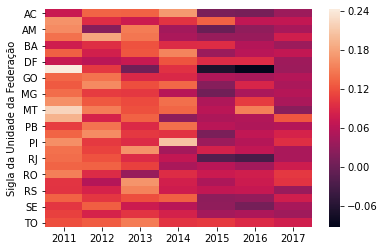

In [79]:
sns.heatmap(taxa)
plt.show()

### 10) Crie uma função que receba a 'UF' (sigla) e plote um gráfico de linha do  PIB (eixo y) e os anos no eixo x.

In [87]:
ufs = grupo.to_frame().reset_index()
ufs

,Ano,Sigla da Unidade da Federação,PIB (R$ 1.000)
0,2010,AC,8.342356e+06
1,2010,AL,2.713304e+07
2,2010,AM,6.087712e+07
3,2010,AP,8.237795e+06
4,2010,BA,1.544195e+08
...,...,...,...
211,2017,RS,4.231509e+08
212,2017,SC,2.771920e+08
213,2017,SE,4.070377e+07
214,2017,SP,2.119854e+09


In [90]:
def plot(sigla):
    uf = ufs[ufs['Sigla da Unidade da Federação'] == sigla]
    sns.lineplot(data = uf, x = 'Ano', y = 'PIB (R$ 1.000)')

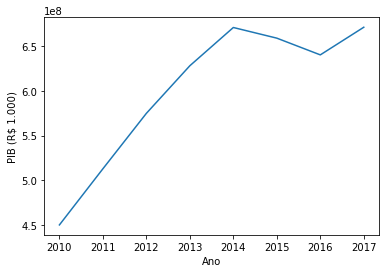

In [93]:
plot('RJ')